In [2]:
import requests
import json
import time
import pandas as pd
import random
# import pycharts

def fetchURL(url):
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
    }

    try:

        r = requests.get(url, headers=headers)
        r.raise_for_status()
        print(r.url)
        return r.text

    except requests.HTTPError as e:
        print(e)
        print("HTTPError")

    except requests.RequestException as e:
        print(e)

    except:
        print("Unknown Error !")


def parserHtml(html):
    try:
        s = json.loads(html)

    except:
        print('error')

    commentlist = []
    hlist = []

    hlist.append("序号")
    hlist.append("昵称")
    hlist.append("性别")
    hlist.append("评论时间")
    hlist.append("评论内容")
    hlist.append("点赞数")
    hlist.append("回复数")
    hlist.append("个性签名")    
    hlist.append("等级")    
#     commentlist.append(hlist)

    # 楼层，用户名，性别，时间，评价，点赞数，回复数

    for i in range(20):  # range(a)中的a指每一页取前a条评论，b站标准20条所以填20。如果填1就会每一页取第一条，见test1。

        comment = s['data']['replies'][i]

        blist = []

        # 这个comment信息量相当大，基本上能搞到评论者个人主页上的所有信息，比如下面还可用comment['member']['sign']拿到签名

        # 具体查看可以拿到的数据：F12-network-手动评论区翻页动作-preview-jQuery-data-replies-0(随便开一个)-content(内容)/member(人)

        # floor = comment['floor']

        username = comment['member']['uname']

        sex = comment['member']['sex']

        ctime = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(comment['ctime']))
        content = comment['content']['message']
        likes = comment['like']
        rcounts = comment['rcount']
        signature = comment['member']['sign']
        level = comment['member']['level_info']['current_level']
        # blist.append(floor)
        blist.append(username)
        blist.append(sex)
        blist.append(ctime)
        blist.append(content)
        blist.append(likes)
        blist.append(rcounts)
        blist.append(signature)
        blist.append(level)
        commentlist.append(blist)

    writePage(commentlist)

    print('---' * 20)


def writePage(urating):
    dataframe = pd.DataFrame(urating)

    dataframe.to_csv('youngcomment.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")


# 当然，每次csv应当换名字。追加Office打开的csv会报错。


if __name__ == '__main__':
    e = 0
    page = 1
    while e == 0:
        url = "https://api.bilibili.com/x/v2/reply?pn=" + str(
            page) + "&type=1&oid=25784740&sort=2&_=1609937800830"
        # 这里"oid="后面是要爬的av号
        try:
            html = fetchURL(url)
            print('page:', page)

            parserHtml(html)

            page = page + 1
            if page % 10 == 0:
                time.sleep(7)  # 每爬一页便(假装)歇几秒，怕封IP
        except:
            e = 1



https://api.bilibili.com/x/v2/reply?pn=1&type=1&oid=25784740&sort=2&_=1609937800830
page: 1
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=2&type=1&oid=25784740&sort=2&_=1609937800830
page: 2
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=3&type=1&oid=25784740&sort=2&_=1609937800830
page: 3
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=4&type=1&oid=25784740&sort=2&_=1609937800830
page: 4
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=5&type=1&oid=25784740&sort=2&_=1609937800830
page: 5
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=6&type=1&oid=25784740&sort=2&_=1609937800830
page: 6
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=7&type=1&oid=25784740&sort=2&_=160993780083

In [3]:
import pandas as pd

data = pd.read_csv(r"youngcomment.csv")
col = ['username', 'sex', 'ctime', 'content', 'likes', 'rcounts', 'signature', 'level']
data.columns = col
data.head()

,username,sex,ctime,content,likes,rcounts,signature,level
0,暗影猎手ShadowHunter,男,2018-07-06 15:40:57,新手推荐套餐：妆前乳，粉底，眉毛，眼影，口红,941,36,。,5
1,shimlly鹿屿,保密,2018-06-30 12:15:24,看一花的视频已经变成了老手了 想看进阶版本化妆技术！！！！！！,1470,8,NaN,5
2,路人买戏票,保密,2018-07-12 15:55:48,真的！一定！要！控制买口红的数量！！千万要控制住自己啊，我现在就是深度口红坑受害者，平时就是...,880,22,NaN,5
3,兔叽巨甜,保密,2018-10-20 15:28:11,希望可以出一些适合学生党的平价底妆推荐。刚入坑的小白看着那些up主推荐好用的大牌。再看看自己...,678,7,NaN,4
4,ー里波知,女,2018-11-12 18:46:40,建议大家第一次一定要买贵一点 能保证一定正品的地方购买！！血的教训,314,5,"常逛生活区游戏区, A团黄担/钉宫癌晚期/ow白给王,19年沉迷学习,波知波知⸜(* ॑꒳ ...",6


In [4]:
data.describe()#可以查看数据的基本情况，包括：count 非空值数、mean 平均值、std 标准差、max 最大值、min 最小值、（25%、50%、75%）分位数等。

,likes,rcounts,level
count,659.000000,659.000000,659.000000
mean,10.394537,0.573596,4.819423
std,83.688446,2.272868,0.585425
min,0.000000,0.000000,2.000000
25%,0.000000,0.000000,5.000000
50%,0.000000,0.000000,5.000000
75%,2.000000,0.000000,5.000000
max,1470.000000,36.000000,6.000000


In [5]:
data = data.dropna(axis=1)
data.dropna(axis=1)#处理缺失数据，丢弃带有NAN的所有项
# axis: 删除行还是列，行是0或index,列是1或column，默认是行


,username,sex,ctime,content,likes,rcounts,level
0,暗影猎手ShadowHunter,男,2018-07-06 15:40:57,新手推荐套餐：妆前乳，粉底，眉毛，眼影，口红,941,36,5
1,shimlly鹿屿,保密,2018-06-30 12:15:24,看一花的视频已经变成了老手了 想看进阶版本化妆技术！！！！！！,1470,8,5
2,路人买戏票,保密,2018-07-12 15:55:48,真的！一定！要！控制买口红的数量！！千万要控制住自己啊，我现在就是深度口红坑受害者，平时就是...,880,22,5
3,兔叽巨甜,保密,2018-10-20 15:28:11,希望可以出一些适合学生党的平价底妆推荐。刚入坑的小白看着那些up主推荐好用的大牌。再看看自己...,678,7,4
4,ー里波知,女,2018-11-12 18:46:40,建议大家第一次一定要买贵一点 能保证一定正品的地方购买！！血的教训,314,5,6
...,...,...,...,...,...,...,...
654,咕咕酒_,保密,2018-06-30 12:05:38,哇⊙∀⊙！,0,0,5
655,吖hooo,保密,2018-06-30 12:04:18,二十五,0,0,5
656,吖hooo,保密,2018-06-30 12:04:12,我第二十万,0,0,5
657,幕茴,女,2018-06-30 12:01:52,刚刚！,0,0,5


In [6]:
data = data.drop_duplicates()
data.drop_duplicates()#去除重复项

,username,sex,ctime,content,likes,rcounts,level
0,暗影猎手ShadowHunter,男,2018-07-06 15:40:57,新手推荐套餐：妆前乳，粉底，眉毛，眼影，口红,941,36,5
1,shimlly鹿屿,保密,2018-06-30 12:15:24,看一花的视频已经变成了老手了 想看进阶版本化妆技术！！！！！！,1470,8,5
2,路人买戏票,保密,2018-07-12 15:55:48,真的！一定！要！控制买口红的数量！！千万要控制住自己啊，我现在就是深度口红坑受害者，平时就是...,880,22,5
3,兔叽巨甜,保密,2018-10-20 15:28:11,希望可以出一些适合学生党的平价底妆推荐。刚入坑的小白看着那些up主推荐好用的大牌。再看看自己...,678,7,4
4,ー里波知,女,2018-11-12 18:46:40,建议大家第一次一定要买贵一点 能保证一定正品的地方购买！！血的教训,314,5,6
...,...,...,...,...,...,...,...
654,咕咕酒_,保密,2018-06-30 12:05:38,哇⊙∀⊙！,0,0,5
655,吖hooo,保密,2018-06-30 12:04:18,二十五,0,0,5
656,吖hooo,保密,2018-06-30 12:04:12,我第二十万,0,0,5
657,幕茴,女,2018-06-30 12:01:52,刚刚！,0,0,5


In [7]:
data = data.sort_values(by='likes',ascending=False,inplace=False)#排序函数
data = data[~data['level'].isin(['LVn等级'])]
data

,username,sex,ctime,content,likes,rcounts,level
1,shimlly鹿屿,保密,2018-06-30 12:15:24,看一花的视频已经变成了老手了 想看进阶版本化妆技术！！！！！！,1470,8,5
0,暗影猎手ShadowHunter,男,2018-07-06 15:40:57,新手推荐套餐：妆前乳，粉底，眉毛，眼影，口红,941,36,5
2,路人买戏票,保密,2018-07-12 15:55:48,真的！一定！要！控制买口红的数量！！千万要控制住自己啊，我现在就是深度口红坑受害者，平时就是...,880,22,5
3,兔叽巨甜,保密,2018-10-20 15:28:11,希望可以出一些适合学生党的平价底妆推荐。刚入坑的小白看着那些up主推荐好用的大牌。再看看自己...,678,7,4
4,ー里波知,女,2018-11-12 18:46:40,建议大家第一次一定要买贵一点 能保证一定正品的地方购买！！血的教训,314,5,6
...,...,...,...,...,...,...,...
384,turehah,保密,2018-06-30 17:08:28,get√,0,0,5
383,拾年-arouse,女,2018-06-30 17:12:15,一花❤ 赶上了 海你❤,0,0,5
382,Conniecc6,保密,2018-06-30 17:13:45,手动表白（⌒▽⌒）,0,0,5
381,今天又很好,女,2018-06-30 17:27:31,表示：刚刚入坑想找日韩代购的可以加我～,0,0,4


In [8]:
data[data['level'] > 5]

,username,sex,ctime,content,likes,rcounts,level
4,ー里波知,女,2018-11-12 18:46:40,建议大家第一次一定要买贵一点 能保证一定正品的地方购买！！血的教训,314,5,6
8,范饱饱咕噜,女,2018-06-30 21:07:38,我记得我刚开始化妆的时候都没有这些博主的帮助，自己跑去化妆品小店里买了一堆韩妆的假货（当时就...,146,1,6
16,考试期间请叫我过儿,女,2019-01-16 23:16:54,买来一堆放在那里根本不想碰，又想继续买买买,60,6,6
55,绵羊在天上飞,保密,2018-09-21 00:48:45,想问大家买这些基础化妆品用了多少r？产品价位大概在多少？,5,13,6
49,假面骑士トコロ,保密,2018-07-01 01:40:48,第一次自己学化妆的时候，从早上7点画到12点，还作死画了眼线，总之我也不知道为毛就是怕画错，...,5,0,6
43,诗岛刚OvO,男,2018-08-01 15:57:06,QAQ我是一名男生，求各位大神指导。因为我真的啥都不懂啊……,5,1,6
67,中二的赤狱,保密,2018-11-11 22:20:47,粉底液买那种隔离防晒之类多功能性粉底液行不，少买一点，麻烦😂,4,0,6
61,霍霍霍霍霍霍霍哈Crane,保密,2018-07-01 12:38:54,妈也！！！一花你怎么知道我要开始化妆了！！！这视频太及时了吧？？爱您么么么,4,0,6
85,假面骑士トコロ,保密,2018-07-01 01:49:07,我也不知道为啥，最近很爱看这些没有广告的美妆视频，可能是真的有点看太多推广累了。,3,0,6
76,五条千鹤,女,2018-07-10 06:51:48,我是在化妆没啥要求，但护肤是真的实打实的要花钱(´；ω；`),3,0,6


In [11]:
from pyecharts.globals import CurrentConfig, NotebookType
# 只需要在顶部声明 CurrentConfig.ONLINE_HOST 即可
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
# 接下来所有图形的静态资源文件都会来自刚启动的服务器
CurrentConfig.ONLINE_HOST

'https://assets.pyecharts.org/assets/'

In [13]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

bar=Bar(init_opts=opts.InitOpts(width="800px", height="400px"))
bar.add_xaxis(data['content'].tolist())
bar.add_yaxis("likes", data["likes"].tolist(), color=Faker.rand_color())
bar.set_global_opts(
    title_opts = opts.TitleOpts(title="评论热度Top"),
    datazoom_opts = [opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
)
# bar.render("柱形图.html")
bar.load_javascript()
bar.render_notebook()

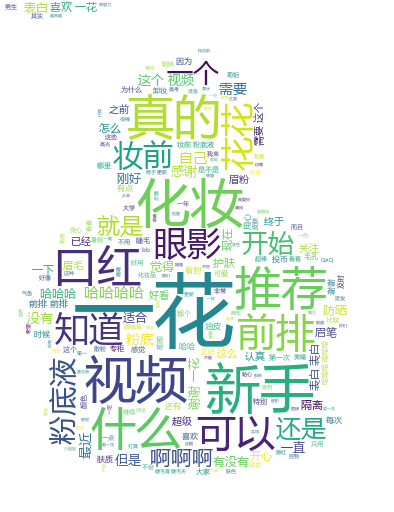

In [15]:
import os
import pandas as pd
import jieba
from imageio import imread
from wordcloud import WordCloud

all_content = ''
list_txt = []
# data = pd.read_csv('comment.csv')

for i in data['content']:
    all_content += str(i)
for c in jieba.cut(all_content):
    if len(c) >= 2:
        list_txt.append(c)
cut_text = " ".join(list_txt)

mask = imread('000.jpg')

wordshow = WordCloud(background_color='white',
                     width=800,
                     height=600,
                     max_words=200,
                     max_font_size=80,
                     font_path="msyh.ttc",    #用微软雅黑作为字体显示效果
                     mask = mask,             #转为词云形状
                      ).generate(cut_text)
 
wordshow.to_file('one.png')  # 转换成图片
from IPython.display import Image
Image('one.png')

In [16]:
data.level.value_counts().sort_index(ascending=False)

6     35
5    485
4    104
3     19
2      3
Name: level, dtype: int64

等级分布

In [17]:
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c1 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip([str(i) for i in range(2,7)], [45,123,225,283,62])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c1

In [18]:
data.sex.value_counts().sort_index(ascending=False)

男      25
女     302
保密    319
Name: sex, dtype: int64

In [19]:
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c2 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(["男","女","保密"], ["404",'103','673'])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="性别分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
    
)
c2

In [20]:
import json, requests
import pandas as pd
from datetime import *
import time


def get_base_info(oid):
    base_info_url = f'https://api.bilibili.com/x/web-interface/archive/stat?aid={oid}'
    base_info = requests.get(base_info_url, headers=dic_header).json()['data']
    # print(base_info) #可以输出转化为json形式的数据
    print('当代青年消费现状视频基本信息：\n')
    print('播放数量：{}\n弹幕数量：{}\n收藏数量：{}\n硬币数量：{}\n分享数量：{}\n点赞数量：{}\n------\n评论数量：{}'.format(
        base_info['view'], base_info['danmaku'], base_info['favorite'],
        base_info['coin'], base_info['share'], base_info['like'], base_info['reply']
    ))

def get_comment_datas(oid):
    comment_url = 'https://api.bilibili.com/x/v2/reply'
    comment_page = 1
    comment_data_lst = []
    while True:
        try:
            param = {'callback': 'jQuery172002097397522090838_' + str(now_time),
                     'jsonp': 'jsonp',
                     'pn': comment_page,
                     'type': '1',
                     'oid': oid,
                     'sort': '2',
                     '_': now_time}

            html = requests.get(url=comment_url, headers=dic_header, params=param)
            start = html.text.index('{')
            end = html.text.index('})') + 1
            comment_data = json.loads(html.text[start:end])['data']['replies']
            # print(comment_data) #成功的转换为json数据
            print(f'当前正在爬取第{comment_page}页评论数据...')
            dic_coment = None
            for data in comment_data:
                dic_coment = {}
                dic_coment['member'] = data['member']['uname']
                dic_coment['like'] = data['like']
                dic_coment['comment'] = data['content']['message']
                dic_coment['time'] = datetime.fromtimestamp(data['ctime'])
                dic_coment['rpid'] = data['rpid_str']
                comment_data_lst.append(dic_coment)
                print('昵称: {}\n点赞数：{}\n'.format(dic_coment['member'], dic_coment['like']))
                # comment_data_lst.extend(get_reply_data(comment_page,dic_coment['rpid']))
                # 这个是下一步封装完爬取回复数据的函数后才添加的

            time.sleep(3)
            # 			if comment_page > 1:
            # 				break
            comment_page += 1

        except Exception as Comment_Page_Error:
            break

    return comment_data_lst

def get_reply_data(comment_page,rpid):
    reply_page = 1
    reply_data_lst =[]
    while True:
        print('正在爬取第{}页评论数据中的第{}页的回复数据......'.format(comment_page,reply_page))
        reply_url = 'https://api.bilibili.com/x/v2/reply/reply?&pn={}&type=1&oid=203575874&ps=10&root={}'.format(reply_page,rpid)
        html = requests.get(url=reply_url, headers=dic_header)
        reply_data = html.json()['data']['replies']
        try:
            for data in reply_data:
                dic_reply = {}
                dic_reply['comment'] = data['content']['message']
                dic_reply['member'] = data['member']['uname']
                dic_reply['like'] = data['like']
                dic_reply['time'] = datetime.fromtimestamp(data['ctime'])
                reply_data_lst.append(dic_reply)
                print('昵称: {}\n点赞数：{}\n'.format(dic_reply['member'],
                        dic_reply['like'] ))
# 			if reply_page > 1:
# 				break
            reply_page += 1

        except Exception as Reply_Page_Error:
            break

    return reply_data_lst



In [20]:
if __name__ == '__main__':
    dic_header = {'User-Agent': 'Mozilla/5.0'}
    oid = 203575874
    get_base_info(oid)

当代青年消费现状视频基本信息：

播放数量：2088658
弹幕数量：2492
收藏数量：22747
硬币数量：104190
分享数量：2901
点赞数量：235130
------
评论数量：2043


In [21]:
if __name__ =='__main__':
    dic_header = {
    'User. Agent ': 'Mozilla/5.8',
    'Referer': 'https://www.bilibili.com/video/BV15h41127Zu'
    }
    # & type = 1 & oid = 585951989 & sort = 2 & _ = 1610032898130
    oid = 203575874
    now_time = int(time.time()*1000)
    # get_ base. info(2616308358)
    df = pd.DataFrame(get_comment_datas(oid))
    df.to_csv('comment1.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")
    print(df.head())
    print(len(df))

当前正在爬取第1页评论数据...
昵称: 语青青的青
点赞数：3980

昵称: 走马灯珠式会所
点赞数：2684

昵称: 大·磚頭
点赞数：1010

昵称: 是巴巴托斯呀
点赞数：547

昵称: 吃king少年
点赞数：258

昵称: 哟iiiii
点赞数：203

昵称: 某科学的笨蛋⑨
点赞数：95

昵称: 斯卡布罗没钱了
点赞数：60

昵称: PlutoRsy
点赞数：51

昵称: 蓝新汌
点赞数：7

昵称: SJLD21
点赞数：4602

昵称: 假面骑士与侦探
点赞数：1833

昵称: 墨面风
点赞数：2313

昵称: 吃花椒的小张同学
点赞数：542

昵称: 愚昧兔
点赞数：15

昵称: Judy橙子林
点赞数：2549

昵称: 初枫菌
点赞数：477

昵称: 一名热爱自由の网友
点赞数：68

昵称: 想好名字再娶吧-
点赞数：256

昵称: 啊啊啊啊呆唯
点赞数：115

当前正在爬取第2页评论数据...
昵称: 小羊酱_Anesthesia
点赞数：306

昵称: 赤正君-Czj
点赞数：794

昵称: 娃哈哈
点赞数：18

昵称: 鑫寒
点赞数：13

昵称: 我是小贝呗
点赞数：188

昵称: coc-罗辑
点赞数：759

昵称: 电王卡卡细
点赞数：252

昵称: 手可摘桃子
点赞数：100

昵称: 絶対に希望する
点赞数：271

昵称: 怪化儿猫
点赞数：118

昵称: 去寻找梦想
点赞数：143

昵称: 二次元的滑尔稽
点赞数：134

昵称: 猫猫软饼
点赞数：83

昵称: 飘在次元的微风
点赞数：7

昵称: 孤夜沐辰
点赞数：180

昵称: -------青影
点赞数：101

昵称: fsffa
点赞数：7

昵称: 好吃de枣子
点赞数：5

昵称: 未央不歌
点赞数：3

昵称: 怀旧的90后玩家
点赞数：6

当前正在爬取第3页评论数据...
昵称: 冷若叶
点赞数：16

昵称: 芙仔
点赞数：4

昵称: 枫被拉扯搁浅
点赞数：46

昵称: 马浩源lj
点赞数：35

昵称: 筑垅址区
点赞数：44

昵称: 说不说不说
点赞数：3

昵称: Mr_白亦非
点赞数：2

昵称: 人生人生已经太匆匆
点赞数：35

昵称: 洛天依___
点赞数：49

昵称: 乐